### Project 2 : Dataset : Electric Vehicle Population Data 
Dataset link :https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Dataset Source : https://catalog.data.gov/dataset
This notebook aims to validate the hypothesis that 1.The number of electric vehicles on the road has increased over time.
2.Most of the Tesla vehicles are from 'WA' state.
3.Electric vehicles having longer ranges are the most selling ones and have higher base MSRP.


In [153]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [154]:
#reading the csv file.
df = pd.read_csv('C:/Users/Rashmini/Downloads/Electric_Vehicle_Population_Data (2).csv')

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124716 entries, 0 to 124715
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         124716 non-null  object 
 1   County                                             124714 non-null  object 
 2   City                                               124714 non-null  object 
 3   State                                              124716 non-null  object 
 4   Postal Code                                        124714 non-null  float64
 5   Model Year                                         124716 non-null  int64  
 6   Make                                               124716 non-null  object 
 7   Model                                              124535 non-null  object 
 8   Electric Vehicle Type                              124716 non-null  object

In [156]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10


In [157]:
df.drop(['Postal Code','Legislative District','DOL Vehicle ID','Electric Utility','2020 Census Tract'],axis=1,inplace=True)

In [158]:
df.head()

,VIN (1-10),County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Vehicle Location
0,5YJ3E1EB4L,Yakima,Yakima,WA,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,POINT (-120.56916 46.58514)
1,5YJ3E1EA7K,San Diego,San Diego,CA,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,POINT (-117.16171 32.71568)
2,7JRBR0FL9M,Lane,Eugene,OR,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,POINT (-123.12802 44.09573)
3,5YJXCBE21K,Yakima,Yakima,WA,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,POINT (-120.56916 46.58514)
4,5UXKT0C5XH,Snohomish,Bothell,WA,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,POINT (-122.18384 47.8031)


In [159]:
df.shape

(124716, 12)

In [160]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 2
City                                                   2
State                                                  0
Model Year                                             0
Make                                                   0
Model                                                181
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Vehicle Location                                      29
dtype: int64

A very few data points are missing so we can remove them

In [161]:
df = df.dropna()

In [162]:
df['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            96061
Plug-in Hybrid Electric Vehicle (PHEV)    28445
Name: Electric Vehicle Type, dtype: int64

Of the vehicle types (BEV, PHEV) most are battery electric vehicles showing a significant transition compared to PHEVs 

In [163]:
 #lets see which city has the most electric vehicles
df['City'].value_counts()

Seattle             21943
Bellevue             6477
Redmond              4641
Vancouver            4462
Kirkland             3920
                    ...  
Carrolls                1
Mccutcheon Field        1
Cougar                  1
Mascoutah               1
Twentynine Palms        1
Name: City, Length: 647, dtype: int64

In [164]:
#Descriptive statistics for electric range and MSRP
df[['Electric Range','Base MSRP']].describe()

,Electric Range,Base MSRP
count,124506.000000,124506.000000
mean,79.589160,1557.898736
std,100.361048,10057.775823
min,0.000000,0.000000
25%,0.000000,0.000000
50%,25.000000,0.000000
75%,200.000000,0.000000
max,337.000000,845000.000000


The city of Seattle shows a large number of electric vehicles

In [165]:
#Lets check from which county we have more entries from (Top 10)

County = df.groupby('County').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('County').count().sort_values(by='City',ascending=False)['City'].values

px.bar(x=list(County)[:10],y=values[:10],labels={'x':"County Name",'y':"Number of Cars"},color=values[:10])

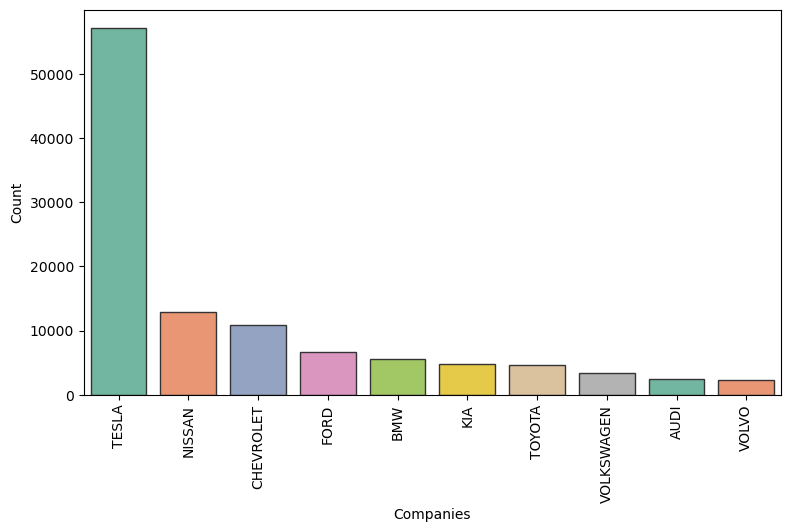

In [166]:
#lets see which company makes most of the electric vehicles
Company_list = df.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('Make').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=list(Company_list)[:10],y=values[:10],edgecolor='.2',palette='Set2')
plt.xticks(rotation='90')
plt.xlabel('Companies')
plt.ylabel('Count')
plt.show()

In [167]:
#pie chart
px.pie(names=list(Companies)[:10],values=values[:10],width=500,height=400)


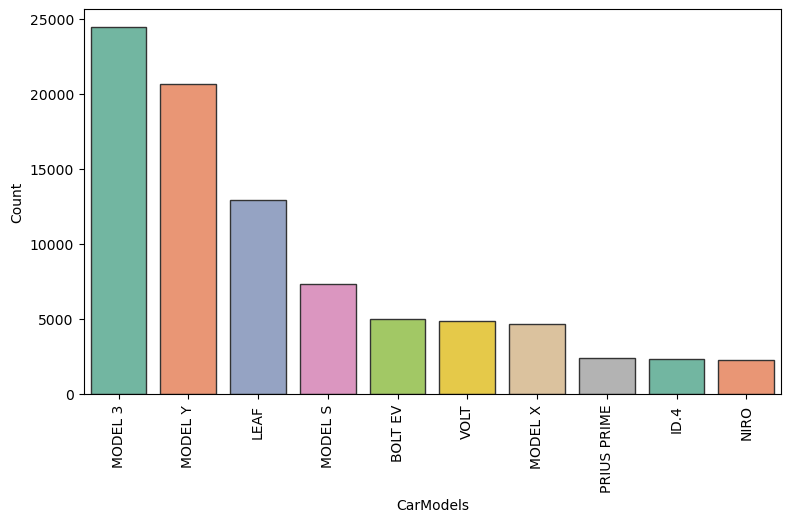

In [168]:
#Top 10 models in use

CarModels = df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=list(CarModels)[:10],y=values[:10],edgecolor='.2',palette='Set2')
plt.xticks(rotation='90')
plt.xlabel('CarModels')
plt.ylabel('Count')
plt.show()

In [169]:
#what are the most sold models per each company
#lets consider the top 10 companies
top_10_companies = list(Companies)[:10]
for i in top_10_companies:
    data = df[df['Make']==i]
    data = data.groupby('Model').count().sort_values(by='City',ascending=False).index
    print('Top selling model for',i,'is ----------->',data[0])

Top selling model for TESLA is -----------> MODEL 3
Top selling model for NISSAN is -----------> LEAF
Top selling model for CHEVROLET is -----------> BOLT EV
Top selling model for FORD is -----------> MUSTANG MACH-E
Top selling model for BMW is -----------> I3
Top selling model for KIA is -----------> NIRO
Top selling model for TOYOTA is -----------> PRIUS PRIME
Top selling model for VOLKSWAGEN is -----------> ID.4
Top selling model for AUDI is -----------> E-TRON
Top selling model for VOLVO is -----------> XC90


In [170]:
#Percentage of BEV vs PHEV

EV_type = list(df.groupby('Electric Vehicle Type').count()['County'].index)
values = df.groupby('Electric Vehicle Type').count()['County'].values

px.pie(names=EV_type,values=values,height=400)

In [171]:
#lets see whats the percentage of top 10 companies vehicles are BEV and PHEV

for index,i in enumerate(top_10_companies):
    data = df[df['Make']==i]
    labels = list(data.groupby('Electric Vehicle Type').count()['City'].index)
    values = list(data.groupby('Electric Vehicle Type').count()['City'].values)
    fig = px.pie(names=labels,values=values,width=700,height=400,title=str(i))
    fig.show()

<AxesSubplot:xlabel='Electric Range', ylabel='Count'>

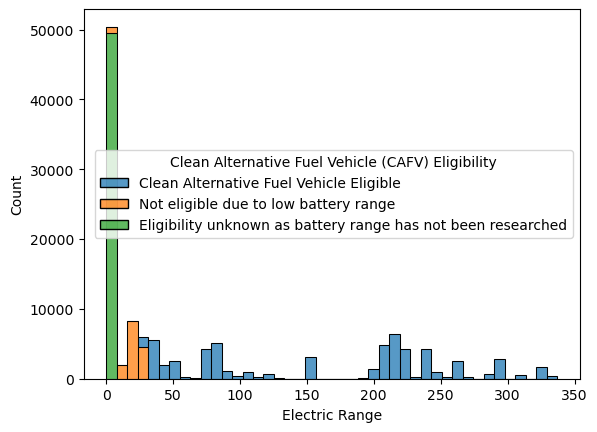

In [172]:
sns.histplot(data=df, x="Electric Range", hue="Clean Alternative Fuel Vehicle (CAFV) Eligibility", multiple="stack")

It is noted that for electric ranges greater than 50 are eligible vehicles with clean fuel. The uncertainty lies in those ranges below 50 as they are either not eligible or there is no clear information on them.

#### Hypothesis 1 : The number of electric vehicles on the road has increased over time.

In [173]:
# Year Wise Cars
Car_model_year = df.groupby('Model Year')['VIN (1-10)'].count().reset_index()
Car_model_year.columns = ['year','num_cars']

fig = px.line(Car_model_year,x="year", y="num_cars", title='Year Wise Number of Cars',markers=True)
fig.show()

By the graph, we can see that - yes, The number of electric vehicles on the road has increased over time. There is slight decrease in sales in 2019 and 2020 due to decreased supply and demand due to covid.

#### Hypothesis 2 : Electric vehicles having longer ranges are the most selling ones and have higher base MSRP.

In [174]:
#lets see top10 most sold cars and top10 most range giving vehicles and check if there is any correlation
top_10_vehicles = list(df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].index)[:10]
top_10_range =  df.sort_values(by='Electric Range',ascending=False)['Model'].unique()[:10]
top_10_vehicles

['MODEL 3',
 'MODEL Y',
 'LEAF',
 'MODEL S',
 'BOLT EV',
 'VOLT',
 'MODEL X',
 'PRIUS PRIME',
 'ID.4',
 'NIRO']

In [175]:
top_10_range

array(['MODEL S', 'MODEL 3', 'MODEL X', 'MODEL Y', 'BOLT EV', 'KONA',
       'ROADSTER', 'NIRO', 'I-PACE', 'PS2'], dtype=object)

Out of top 10 most selling ones are in the top_10 electric range vehicles so range can be a reason of their sales. So yes,the hypothesis that Electric vehicles having longer ranges are the most selling ones is true.

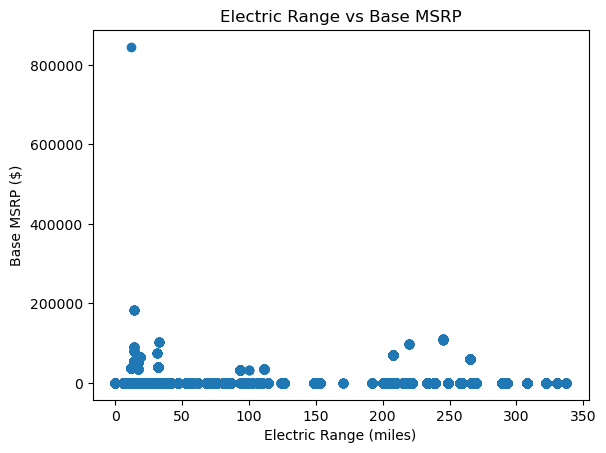

In [176]:
# Extract electric range and base MSRP from the DataFrame
electric_range = df['Electric Range']
base_msrp = df['Base MSRP']

# Create a scatter plot of electric range vs base MSRP
plt.scatter(electric_range, base_msrp)
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.title('Electric Range vs Base MSRP')
plt.show()

By the above graph, Electric vehicles having longer ranges donot have higher base MSRP.

#### Hypothesis 3 : Most of the Tesla vehicles are from 'WA' state.

<AxesSubplot:xlabel='Model Year', ylabel='count'>

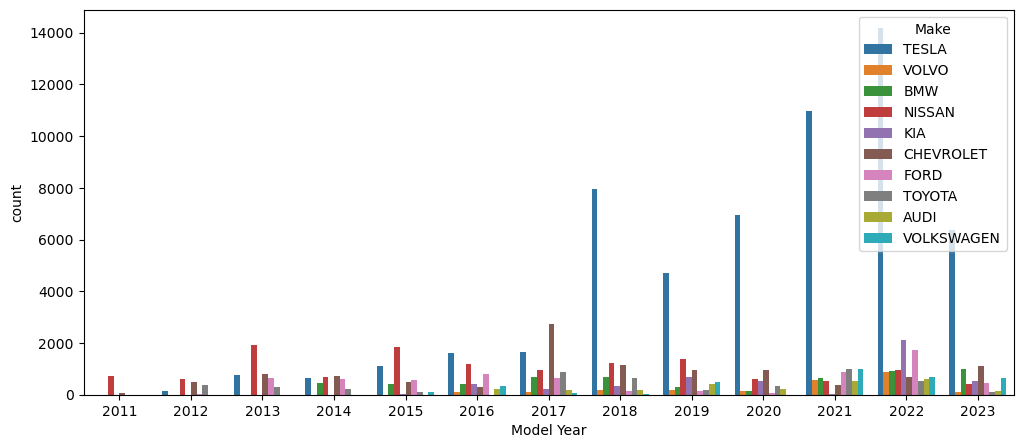

In [177]:
#Number of models of company for each year for last 10 years
#lets consider top_10 companies only

data = df.copy()
data['top_10'] = data['Make'].apply(lambda x:1 if x in top_10_companies else 0)
data = data[data['top_10']==1]
data = data[data['Model Year']>=2011]
plt.figure(figsize=(12,5))
sns.countplot(x = 'Model Year',hue='Make',data=data)

#earlier NISSAN and CHEVY used to have hold of the market then TESLA took over it 

In [178]:
#if we study an individual company TESLA
#1.which state is having more number of TESLA vehicles
#2.Model of which year is in use the most from TESLA

data_TESLA = df[df['Make']=='TESLA']
top_10_states_TESLA = list(data_TESLA.groupby('State').count().sort_values(by='City',ascending=False)['City'].index)[:10]
values = list(data_TESLA.groupby('State').count().sort_values(by='City',ascending=False)['City'].values)[:10]

In [179]:
top_10_states_TESLA

['WA', 'CA', 'VA', 'TX', 'MD', 'IL', 'CO', 'NC', 'AZ', 'SC']

<AxesSubplot:>

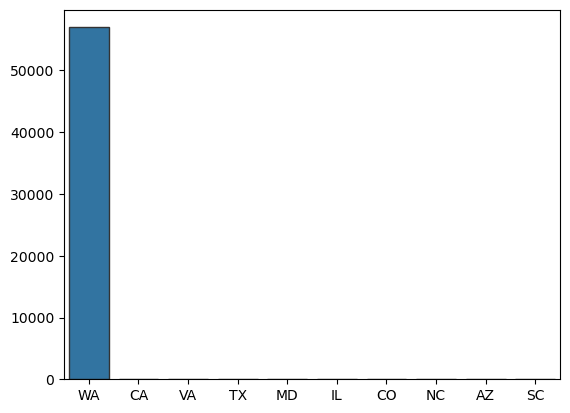

In [180]:
sns.barplot(x = top_10_states_TESLA,y=values,edgecolor='.2')

In [181]:
values

[56979, 42, 16, 12, 11, 5, 4, 4, 4, 4]

Since the Most of the Tesla vehicles are from 'WA' state, the hypothesis is true.

<AxesSubplot:>

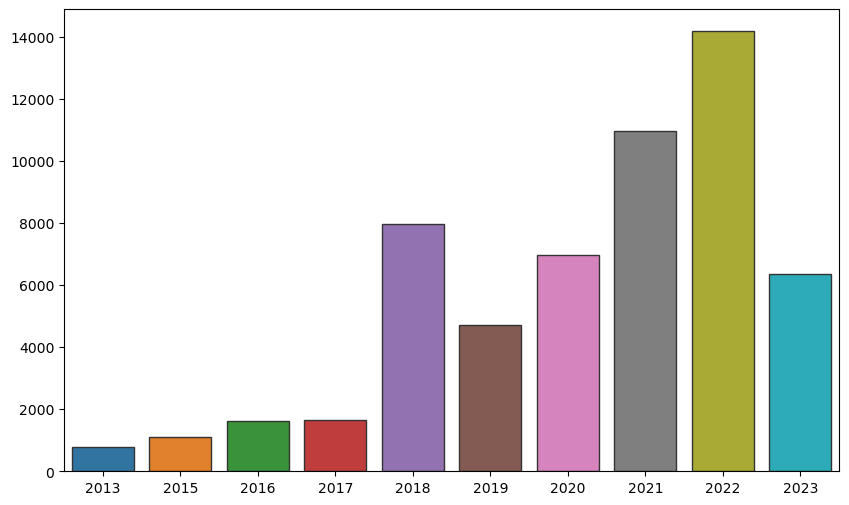

In [182]:
#plotting the values
plt.figure(figsize=(10,6))
top_10_year_TESLA = list(data_TESLA.groupby('Model Year').count().sort_values(by='City',ascending=False)['City'].index)[:10]
values = list(data_TESLA.groupby('Model Year').count().sort_values(by='City',ascending=False)['City'].values)[:10]
sns.barplot(x = top_10_year_TESLA,y=values,edgecolor='.2')

#most models are from 2022 which are sold by tesla

In [152]:
states = list(df.groupby('State').count().sort_values(by='City',ascending=False)['City'].index)
values = df.groupby('State').count().sort_values(by='City',ascending=False)['City'].values
data = pd.DataFrame(df.groupby('State').count().sort_values(by='City',ascending=False)['City'])
data = data.reset_index()
data.columns = ['State','Count']
#A choropleth map is a map where colored or shaded areas represent the magnitude of an attribute.
fig = px.choropleth(data,
                    locations='State', 
                    locationmode="USA-states", 
                    color='Count',
                    color_continuous_scale="blues", 
                    scope="usa")

fig.show()